In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

carlisle gb
rikitea pf
rikitea pf
nome us
roald no
butaritari ki
bredasdorp za
barentsburg sj
hobart au
vaini to
mataura pf
ancud cl
husavik is
hithadhoo mv
cockburn town bs
umzimvubu za
butaritari ki
kodiak us
kapaa us
leningradskiy ru
nikolskoye ru
mataura pf
salalah om
saint-philippe re
tuatapere nz
okha ru
ushuaia ar
punta arenas cl
bolu tr
merauke id
sao jose da coroa grande br
belushya guba ru
puerto ayora ec
istok ru
mataura pf
ormara pk
hithadhoo mv
bambous virieux mu
punta arenas cl
thompson ca
ushuaia ar
georgetown sh
bayan kw
macieira de cambra pt
alice springs au
quartucciu it
ushuaia ar
port alfred za
jalu ly
provideniya ru
inongo cd
ushuaia ar
galle lk
busselton au
chuy uy
constitucion mx
mandalgovi mn
imbituba br
hermanus za
longyearbyen sj
kapaa us
yellowknife ca
hobart au
kodiak us
bairiki ki
geraldton au
hobart au
barrow us
hermanus za
luderitz na
bluff nz
busselton au
hobart au
hobart au
kapaa us
kutum sd
banjar in
bassar tg
punta arenas cl
punta arenas cl
aksarka ru

grootfontein na
lebu cl
mataura pf
husavik is
katsuura jp
hithadhoo mv
ushuaia ar
tuktoyaktuk ca
mataura pf
beringovskiy ru
mataura pf
rikitea pf
mataura pf
imeni poliny osipenko ru
lebu cl
illoqqortoormiut gl
barrow us
dongsheng cn
xining cn
upernavik gl
bredasdorp za
dikson ru
ushuaia ar
attawapiskat ca
ornskoldsvik se
mar del plata ar
arraial do cabo br
mataura pf
hobart au
cherskiy ru
urengoy ru
novyy svit ua
ancud cl
tuktoyaktuk ca
kavaratti in
lata sb
ushuaia ar
atuona pf
te anau nz
ushuaia ar
grand centre ca
ushuaia ar
puerto ayora ec
hermanus za
chuy uy
asahikawa jp
victoria sc
avarua ck
mataura pf
saleaula ws
pueblo nuevo co
saint-francois gp
albany au
cape town za
barentsburg sj
port alfred za
arraial do cabo br
port alfred za
upernavik gl
kamina cd
aklavik ca
punta arenas cl
ushuaia ar
socorro us
mataura pf
narsaq gl
camacha pt
lebu cl
cacapava do sul br
cherskiy ru
hilo us
souillac mu
attawapiskat ca
fairbanks us
atuona pf
rikitea pf
samana do
mys shmidta ru
port elizabeth 

klaksvik fo
mumford gh
punta arenas cl
sao joao da barra br
laguna br
san carlos de bariloche ar
berdigestyakh ru
new norfolk au
new norfolk au
caravelas br
fortuna us
monterey us
vaini to
klaksvik fo
busselton au
vestmannaeyjar is
tautira pf
ushuaia ar
taolanaro mg
busselton au
vaini to
brejo da madre de deus br


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carlisle
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | roald
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | dubbo
Processing Record 38 of Set 4 | soledad
Processing Record 39 of Set 4 | kalamare
Processing Record 40 of Set 4 | nisia floresta
Processing Record 41 of Set 4 | vaovai
City not found. Skipping...
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | stykkisholmur
Processing Record 44 of Set 4 | espinho
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | camacha
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | korla
Processing Record 50 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 5 | obidos
Processing Record 2 of Set 5 | porto novo
Processing Record 3 of Set 5 | verkhnyaya inta
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | san andres
Processing Record 7 of Set 5 | lashio
Processing Record 8 of Set 5 | hobyo
Processing Recor

Processing Record 24 of Set 8 | san luis
Processing Record 25 of Set 8 | norrtalje
Processing Record 26 of Set 8 | kununurra
Processing Record 27 of Set 8 | puri
Processing Record 28 of Set 8 | zhangye
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | yulara
Processing Record 31 of Set 8 | gorontalo
Processing Record 32 of Set 8 | saint-ambroise
Processing Record 33 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 34 of Set 8 | olmos
Processing Record 35 of Set 8 | flinders
Processing Record 36 of Set 8 | puerto madryn
Processing Record 37 of Set 8 | severo-kurilsk
Processing Record 38 of Set 8 | wattegama
Processing Record 39 of Set 8 | saint-pierre
Processing Record 40 of Set 8 | kamyshevatskaya
Processing Record 41 of Set 8 | ternate
Processing Record 42 of Set 8 | ulladulla
Processing Record 43 of Set 8 | werda
Processing Record 44 of Set 8 | dauphin
Processing Record 45 of Set 8 | princeton
Processing Record 46 of Set 8 | ketchikan
Processin

Processing Record 12 of Set 12 | marathon
Processing Record 13 of Set 12 | phan rang
City not found. Skipping...
Processing Record 14 of Set 12 | luis correia
Processing Record 15 of Set 12 | sisophon
Processing Record 16 of Set 12 | virbalis
Processing Record 17 of Set 12 | jhabua
Processing Record 18 of Set 12 | mirpur mathelo
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | xichang
Processing Record 21 of Set 12 | sept-iles
Processing Record 22 of Set 12 | palmer
Processing Record 23 of Set 12 | bilibino
Processing Record 24 of Set 12 | ous
Processing Record 25 of Set 12 | miranda
Processing Record 26 of Set 12 | thap than
Processing Record 27 of Set 12 | meulaboh
Processing Record 28 of Set 12 | bazarnyye mataki
Processing Record 29 of Set 12 | toftir
City not found. Skipping...
Processing Record 30 of Set 12 | yumen
Processing Record 31 of Set 12 | abu samrah
Processing Record 32 of Set 12 | montague
Processing Record 33 of Set 12 | acari
Processing Record 3

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carlisle,40.2015,-77.1889,72.90,73,38,5.21,US,2021-09-27 23:49:58
1,Rikitea,-23.1203,-134.9692,73.56,73,3,20.87,PF,2021-09-27 23:46:32
2,Nome,64.5011,-165.4064,37.47,65,1,9.22,US,2021-09-27 23:46:40
3,Roald,62.5833,6.1333,64.54,55,75,12.66,NO,2021-09-27 23:51:14
4,Butaritari,3.0707,172.7902,83.84,75,27,19.15,KI,2021-09-27 23:51:14
5,Bredasdorp,-34.5322,20.0403,51.12,87,4,5.75,ZA,2021-09-27 23:51:14
6,Hobart,-42.8794,147.3294,59.25,64,75,3.00,AU,2021-09-27 23:51:15
7,Vaini,-21.2000,-175.2000,78.96,83,20,6.91,TO,2021-09-27 23:51:15
8,Mataura,-46.1927,168.8643,57.47,39,47,4.50,NZ,2021-09-27 23:51:16
9,Ancud,-41.8697,-73.8203,51.33,86,77,3.51,CL,2021-09-27 23:46:41


In [10]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carlisle,US,2021-09-27 23:49:58,40.2015,-77.1889,72.90,73,38,5.21
1,Rikitea,PF,2021-09-27 23:46:32,-23.1203,-134.9692,73.56,73,3,20.87
2,Nome,US,2021-09-27 23:46:40,64.5011,-165.4064,37.47,65,1,9.22
3,Roald,NO,2021-09-27 23:51:14,62.5833,6.1333,64.54,55,75,12.66
4,Butaritari,KI,2021-09-27 23:51:14,3.0707,172.7902,83.84,75,27,19.15
5,Bredasdorp,ZA,2021-09-27 23:51:14,-34.5322,20.0403,51.12,87,4,5.75
6,Hobart,AU,2021-09-27 23:51:15,-42.8794,147.3294,59.25,64,75,3.00
7,Vaini,TO,2021-09-27 23:51:15,-21.2000,-175.2000,78.96,83,20,6.91
8,Mataura,NZ,2021-09-27 23:51:16,-46.1927,168.8643,57.47,39,47,4.50
9,Ancud,CL,2021-09-27 23:46:41,-41.8697,-73.8203,51.33,86,77,3.51


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

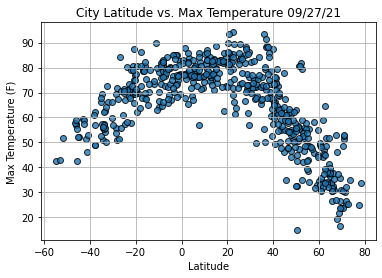

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

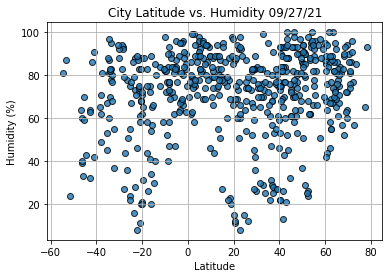

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

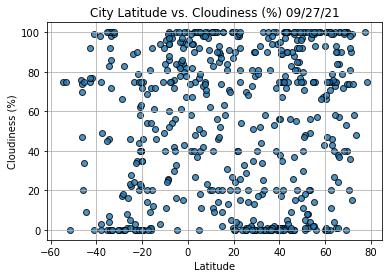

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

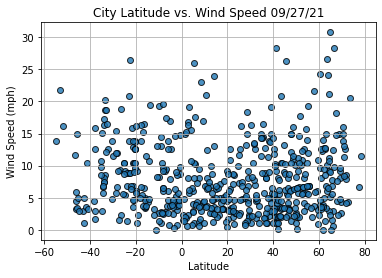

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2021-09-27 23:51:19
Lat                         57.79
Lng                     -152.4072
Max Temp                    45.91
Humidity                       51
Cloudiness                    100
Wind Speed                   3.67
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
553     True
554     True
555    False
556     True
557    False
Name: Lat, Length: 558, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carlisle,US,2021-09-27 23:49:58,40.2015,-77.1889,72.90,73,38,5.21
2,Nome,US,2021-09-27 23:46:40,64.5011,-165.4064,37.47,65,1,9.22
3,Roald,NO,2021-09-27 23:51:14,62.5833,6.1333,64.54,55,75,12.66
4,Butaritari,KI,2021-09-27 23:51:14,3.0707,172.7902,83.84,75,27,19.15
10,Husavik,IS,2021-09-27 23:51:17,66.0449,-17.3389,31.91,75,84,0.56


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

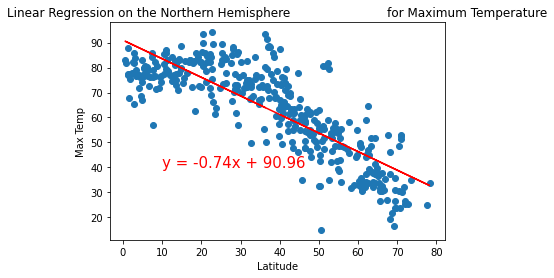

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

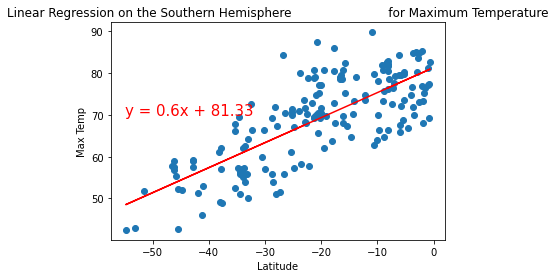

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,70))

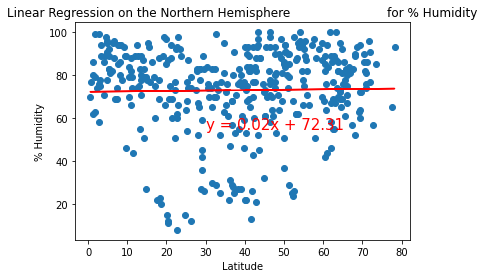

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(30,55))

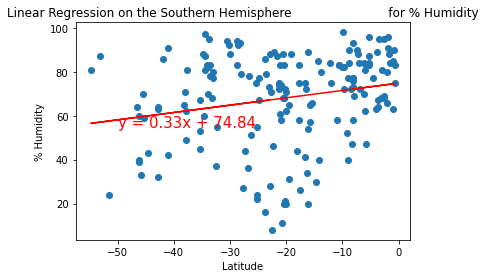

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,55))

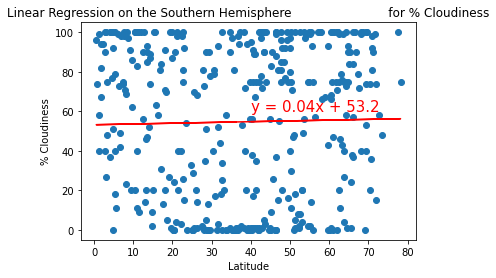

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

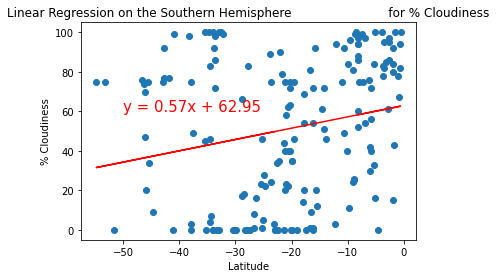

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

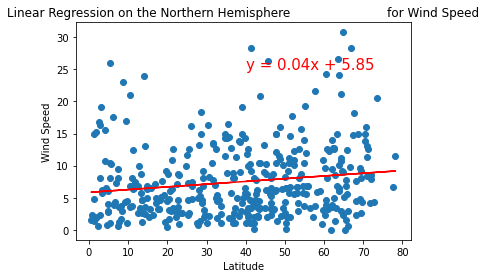

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

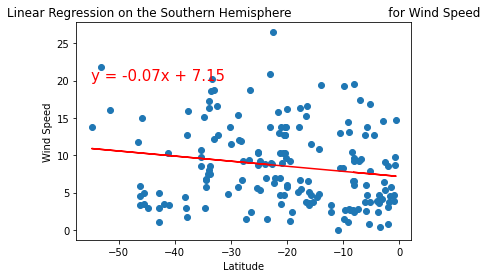

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))